In [1]:
import os

# Import packages needed to extract road network using a polygon
import osmnx as ox
import geopandas

# Import packages to extract buildings using a polygon
import matplotlib.pyplot as plt
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.16.2'

In [2]:
# Read polygon
FL23= geopandas.read_file("C:\\Users\\Sofia\\Dropbox\\Barriers_US\\Polygons\\FL23_geo.shp")

# Extract just the geometry (shapely object) part
FL23_geo = FL23['geometry'].iloc[0]

# clean it with a buffer and check if it's valid
FL23_geo = FL23_geo.buffer(0)
FL23_geo.is_valid

True

In [3]:
# Extract buildings using polygon
FL23_b = ox.geometries_from_polygon(FL23_geo, tags={'building':True})

C:\conda\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

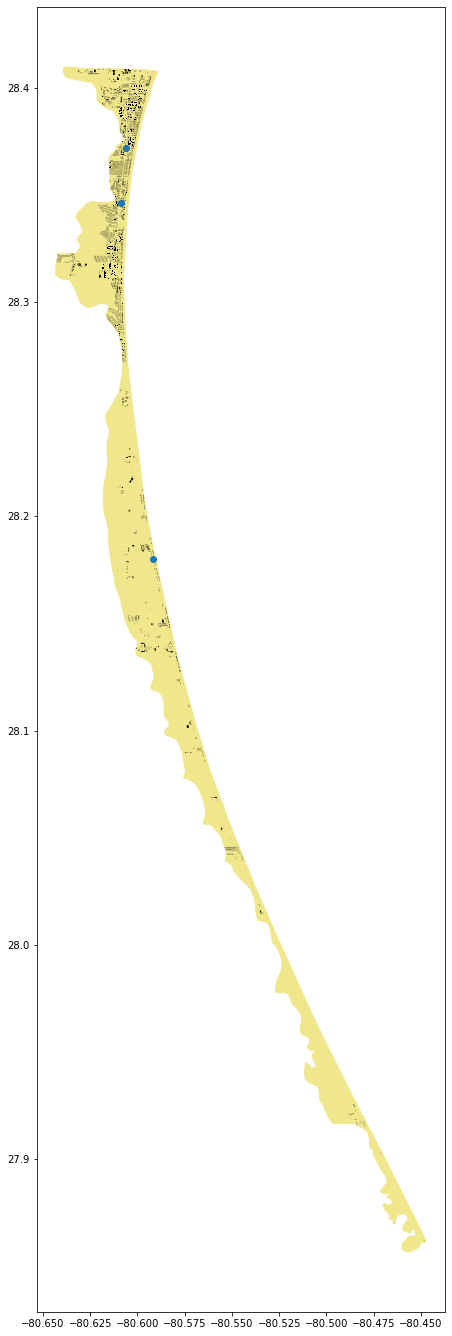

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24,24))

# Plot the footprint
FL23.plot(ax=ax, facecolor='khaki')
FL23_b.plot(ax=ax, facecolor='black')

In [6]:
# save building footprints as a shapefile
FL23_b_save = FL23_b.applymap(lambda x: str(x) if isinstance(x, list) else x)
FL23_b_save.drop(labels='nodes', axis=1).to_file('C:\\Users\\Sofia\\Dropbox\\Barriers_US\\FL23_footprints.gpkg')